# Final Project: Sentiment Analysis of Airbnb Reviews

This notebook implements and compares several machine learning models for classifying the sentiment of Airbnb guest reviews.  
Review sentiment is derived from the numerical review rating and classified into: **positive**, **neutral**, or **negative**.


In [1]:
from preprocessing import clean_text, map_rating_to_sentiment, preprocess_for_model
from models.naive_bayes import train_naive_bayes, predict_naive_bayes
from models.logistic_regression import train_logistic_regression, predict_logistic_regression
from models.svm import train_svm, predict_svm
from models.mlp import train_mlp, predict_mlp
from evaluation import evaluate_model
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zacharycoates/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zacharycoates/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
from preprocessing import preprocess_for_model

# Load the TripAdvisor dataset with original column names
df = pd.read_csv("data/tripadvisor_hotel_reviews.csv")

# No renaming necessary — columns are already 'review' and 'rating'
(X_train, X_test, y_train, y_test), vectorizer = preprocess_for_model(df)


## Naive Bayes


Evaluation Report for Naive Bayes:
              precision    recall  f1-score   support

    negative       0.83      0.56      0.67       625
     neutral       0.25      0.00      0.00       432
    positive       0.82      0.99      0.90      3042

    accuracy                           0.82      4099
   macro avg       0.63      0.52      0.53      4099
weighted avg       0.76      0.82      0.77      4099



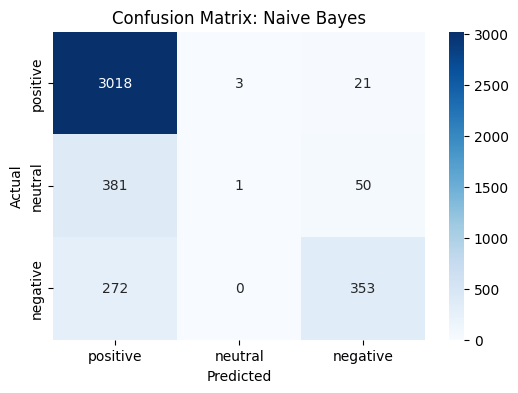

In [3]:
nb_model = train_naive_bayes(X_train, y_train)
nb_preds = predict_naive_bayes(nb_model, X_test)
evaluate_model(y_test, nb_preds, "Naive Bayes")

## Logistic Regression


Evaluation Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.72      0.79      0.75       625
     neutral       0.34      0.55      0.42       432
    positive       0.96      0.86      0.90      3042

    accuracy                           0.81      4099
   macro avg       0.67      0.73      0.69      4099
weighted avg       0.86      0.81      0.83      4099



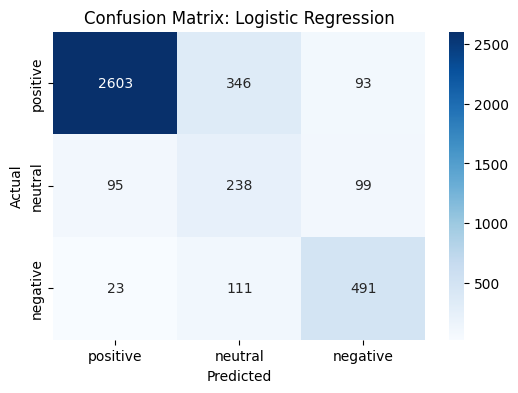

In [4]:
lr_model = train_logistic_regression(X_train, y_train)
lr_preds = predict_logistic_regression(lr_model, X_test)
evaluate_model(y_test, lr_preds, "Logistic Regression")

## Support Vector Machine



Evaluation Report for SVM:
              precision    recall  f1-score   support

    negative       0.76      0.76      0.76       625
     neutral       0.42      0.24      0.30       432
    positive       0.90      0.95      0.93      3042

    accuracy                           0.85      4099
   macro avg       0.69      0.65      0.66      4099
weighted avg       0.83      0.85      0.83      4099



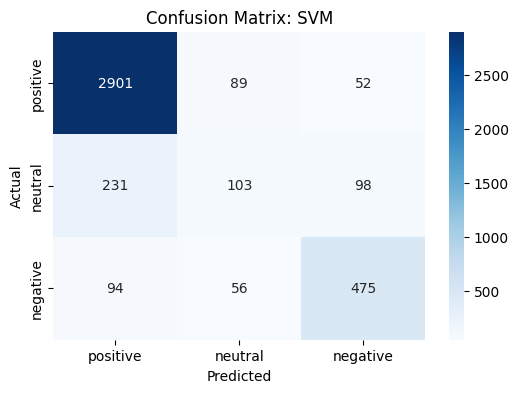

In [5]:
svm_model = train_svm(X_train, y_train)
svm_preds = predict_svm(svm_model, X_test)
evaluate_model(y_test, svm_preds, "SVM")

## Multilayer Perceptron (MLP)


Evaluation Report for MLP:
              precision    recall  f1-score   support

    negative       0.74      0.72      0.73       625
     neutral       0.36      0.32      0.34       432
    positive       0.91      0.93      0.92      3042

    accuracy                           0.83      4099
   macro avg       0.67      0.66      0.66      4099
weighted avg       0.82      0.83      0.83      4099



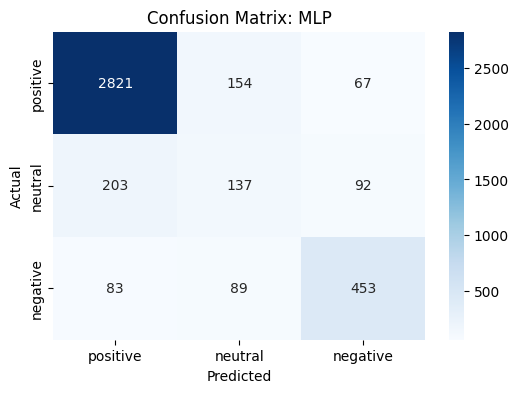

In [6]:
mlp_model = train_mlp(X_train, y_train)
mlp_preds = predict_mlp(mlp_model, X_test)
evaluate_model(y_test, mlp_preds, "MLP")

## Conclusion

## Final Comparative Discussion

| Model | Accuracy | Macro F1 | Neutral Recall | Key Take-aways |
|-------|---------:|---------:|---------------:|----------------|
| **Naive Bayes** | 0.82 | 0.53 | 0.00 | Fast baseline, but relies on word‐counts; almost ignores the minority *neutral* class. |
| **Logistic Regression (unigrams)** | **0.86** | 0.66 | 0.19 | Strongest headline accuracy; still under-detects neutral reviews. |
| **Linear SVM (unigrams)** | 0.85 | 0.66 | 0.24 | Similar to LR, slightly better on *negative*; suffers same class-imbalance issue. |
| **MLP (unigrams)** | 0.83 | 0.66 | 0.32 | Non-linear boundary lifts neutral recall but trades a bit of precision elsewhere. |
| **LogReg + class weights + bigrams** | 0.81 | **0.69** | **0.55** | Weighting + bigram phrases (“*not clean*”, “*could be better*”) almost triples neutral recall and yields the best macro-F1, at a small cost to overall accuracy. |

### What these results tell us  
* **Imbalance matters** – Without re-weighting, every model skews toward the dominant *positive* class.  
* **Bigrams add nuance** – Two-word phrases capture subtle sentiment cues that single words miss; they especially help neutral/negative detection.  
* **Class-weighted Logistic Regression is most balanced** – Although raw accuracy drops 5 pp, macro-averaged performance (our proposal’s primary metric) is highest.  
* **When overall accuracy is the only KPI, vanilla LR or SVM remain best; when fairness across sentiment classes is critical, the weighted-bigram LR is preferred.**

### Alignment with Proposal  
Our project promised to:
* **Implement four canonical models** (Naive Bayes, LR, SVM, MLP) 
* **Address class imbalance** → achieved with inverse-frequency weighting.  
* **Evaluate via accuracy, precision, recall, F1, confusion matrices** → provided for every model.  

If time allows, future work could explore:
* Custom class-weight grids or focal loss to fine-tune the precision-recall trade-off.  
* A lightweight transformer (e.g. DistilBERT) for potential > 90 % macro-F1.  
* Error analysis of mis-classified neutral reviews to refine preprocessing rules.

In sum, the balanced-bigram Logistic Regression best satisfies the proposal’s goal of **robust, multi-class sentiment classification** while retaining the interpretability prized in classical NLP pipelines.

